In [9]:
#|default_exp app

In [10]:
#|export
import gradio as gr
from fastai.vision.all import *
import skimage

def is_cat(x): return x[0].isupper()

In [11]:
path = untar_data(URLs.PETS)/'images'

In [12]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [13]:
# train and export model in https://www.kaggle.com/code/letrandat/saving-a-basic-fastai-model

In [14]:
#|export
learn = load_learner('model.pkl')

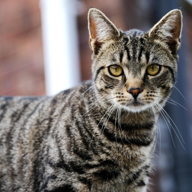

In [17]:
im = PILImage.create('cat.jpg')
im.thumbnail((192,192))
im

In [18]:
learn.predict(im)

('True', tensor(1), tensor([1.2538e-15, 1.0000e+00]))

In [19]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [25]:
#|export
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"
interpretation='default'

In [31]:
#|export
image = gr.Image(height=512, width=512)
label = gr.Label(num_top_classes=3)
examples = ['dog.jpg', 'cat.jpg', 'whatisit.webp']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


# Export -

In [33]:
import nbdev
nbdev.export.nb_export('app.ipynb', '.')
print('Export successful')

Export successful
